In [62]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
# X = X/255.0

# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# The output layer with 4 neurons, for 4 classes
model.add(Dense(15))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Training the model, with 20 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X, y, batch_size=32, epochs=20, validation_split=0.1)

Train on 13501 samples, validate on 1501 samples
Epoch 1/20
13501/13501 [==============================] - 10s 721us/sample - loss: 3.1244 - acc: 0.1097 - val_loss: 1.9726 - val_acc: 0.3344
Epoch 2/20
13501/13501 [==============================] - 8s 627us/sample - loss: 1.7328 - acc: 0.4312 - val_loss: 1.1057 - val_acc: 0.6682
Epoch 3/20
13501/13501 [==============================] - 9s 692us/sample - loss: 1.1156 - acc: 0.6525 - val_loss: 0.8113 - val_acc: 0.7368
Epoch 4/20
13501/13501 [==============================] - 9s 669us/sample - loss: 0.8885 - acc: 0.7343 - val_loss: 0.6749 - val_acc: 0.8015
Epoch 5/20
13501/13501 [==============================] - 9s 658us/sample - loss: 0.7837 - acc: 0.7689 - val_loss: 0.6286 - val_acc: 0.8141
Epoch 6/20
13501/13501 [==============================] - 8s 604us/sample - loss: 0.6682 - acc: 0.8027 - val_loss: 0.5781 - val_acc: 0.8374
Epoch 7/20
13501/13501 [==============================] - 8s 599us/sample - loss: 0.6087 - acc: 0.8238 - val_l

Saved model to disk
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


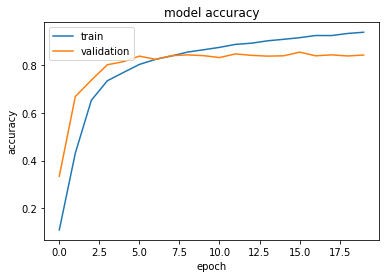

In [63]:
# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('kerasmodel.h5')

# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


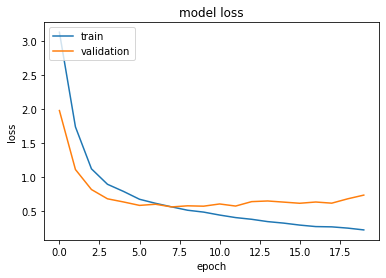

In [64]:
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [65]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_137 (Activation)  (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_138 (Activation)  (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 3, 3, 64)        